In [1]:
import pandas as pd
import numpy as np

In [2]:
Salary_Data=pd.read_csv("Salary_Data.csv")
Salary_Data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
Salary_Data.shape

(30, 2)

In [4]:
x=Salary_Data.loc[:,'YearsExperience']
x.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [5]:
y=Salary_Data.loc[:,"Salary"]
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

# EDA

In [6]:
Salary_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
Salary_Data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
Salary_Data.isna().sum().sum()

0

Outlier Checking

In [10]:
def min_outlier():
    outlier_value=3.2-(1.5*3.2)
    return outlier_value    

In [11]:
min_outlier()

-1.6000000000000005

In [12]:
def max_outlier():
    outlier_value=10.5+(1.5*10.5)
    return outlier_value    

In [13]:
max_outlier()

26.25

In [14]:
Salary_Data.loc[Salary_Data.YearsExperience<=-1.6]

,YearsExperience,Salary


NO outlier at min side 

In [15]:
Salary_Data.loc[Salary_Data.YearsExperience>26.25]

,YearsExperience,Salary


In [24]:
import seaborn as sns

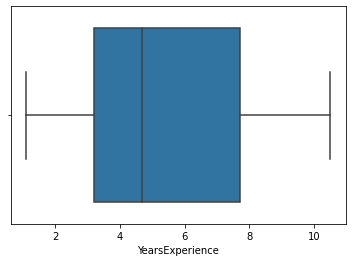

In [17]:
sns.boxplot(Salary_Data.YearsExperience)

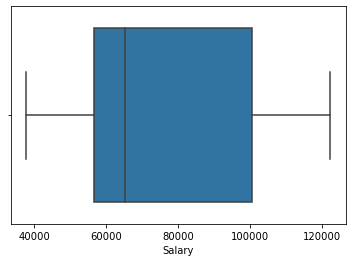

In [18]:
sns.boxplot(Salary_Data.Salary)

In [25]:
import matplotlib.pyplot as plt

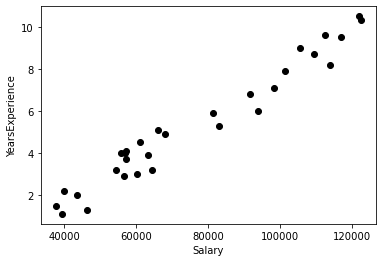

In [34]:
plt.scatter(Salary_Data.Salary,Salary_Data.YearsExperience,color="Black")
plt.xlabel("Salary")
plt.ylabel("YearsExperience")
plt.show()

In [ ]:
#main work

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=3)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
LR=LinearRegression()

In [39]:
Model1=LR.fit(xtrain.values.reshape(-1, 1),ytrain)

In [40]:
Model1.intercept_

26197.76702738423

In [41]:
Model1.coef_

array([9418.56697369])

In [47]:
predict=Model1.predict(xtest.values.reshape(-1, 1))
predict

array([ 72348.74519846,  53511.61125108, 100604.44611953, 115674.15327744,
        81767.31217215,  68581.31840899])

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [53]:
mean_squared_error(ytest,predict)

14564390.30673483

In [54]:
r2_score(ytest,predict)

0.9695039421049821

In [56]:
mean_absolute_error(ytest,predict)

2901.36085525863

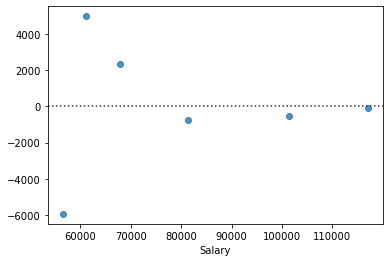

In [59]:
 sns.residplot(ytest,predict)

# different way 

In [63]:
import statsmodels.formula.api as smf


In [129]:
from sklearn.model_selection import train_test_split

In [130]:
train,test=train_test_split(Salary_Data,test_size=.25,random_state=0)

In [133]:
train.shape

(22, 2)

In [134]:
test.shape

(8, 2)

In [136]:
model=smf.ols("Salary~YearsExperience",data=train).fit()


In [137]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     310.8
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           1.18e-13
Time:                        01:11:56   Log-Likelihood:                -222.44
No. Observations:                  22   AIC:                             448.9
Df Residuals:                      20   BIC:                             451.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.699e+04   2927.416      9.219      0.000    2.09e+04    3.31e+04
YearsExperience  9379.7105    532.042     17.630      0.000    8269.891    1.05e+04
==============================================================================
Omnibus:                        3.210   Durbin-Watson:                   2.601
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                1.397
Skew:                           0.188   Prob(JB):                        0.497
Kurtosis:                       1.824   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
model.params

Intercept          26986.691317
YearsExperience     9379.710492
dtype: float64

In [139]:
model.conf_int(0.05) # 95% confidence interval


,0,1
Intercept,20880.207523,33093.175110
YearsExperience,8269.890885,10489.530099


In [142]:
pred = model.predict(test) 

In [143]:
pred

2      41056.257055
28    123597.709384
13     65443.504334
10     63567.562235
26    116093.940990
24    108590.172597
27    117031.912039
11     64505.533285
dtype: float64

In [146]:
test.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [147]:
r2_score(test.Salary,pred)

0.97792083354176

In [148]:
mean_absolute_error(test.Salary,pred)

3508.545593066063

In [149]:
mean_squared_error(test.Salary,pred)

22407940.14334081

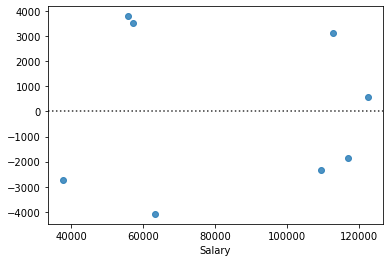

In [150]:
sns.residplot(test.Salary,pred)

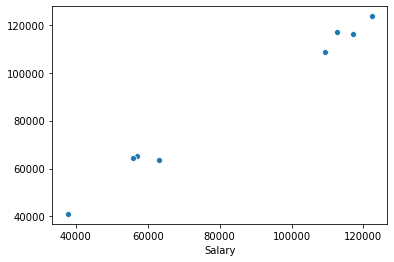

In [152]:
sns.scatterplot(test.Salary,pred)

In [153]:
error=test.Salary-pred

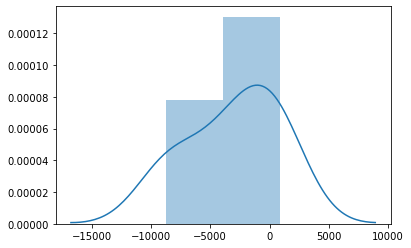

In [154]:
sns.distplot(error)

In [156]:
error.mean()

-3079.57398978908

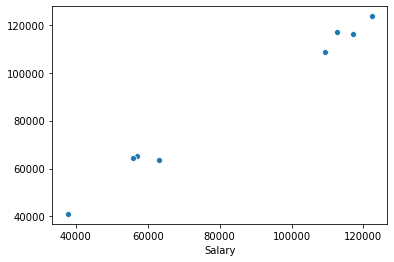

In [157]:
sns.scatterplot(test.Salary,pred)

In [162]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [165]:
auto=het_breuschpagan(model.resid, train)


(12.5224194482778,
 0.0004020978657641721,
 13.21267530245608,
 0.00022016487570485077)

In [170]:
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels,auto)))

{'LM Statistic': 12.5224194482778, 'LM-Test p-value': 0.0004020978657641721, 'F-Statistic': 13.21267530245608, 'F-Test p-value': 0.00022016487570485077}
